In [2]:
!python --version

Python 3.8.19


In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12927288837492229117
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2238133044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17258556368158651459
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


<Figure size 640x480 with 0 Axes>

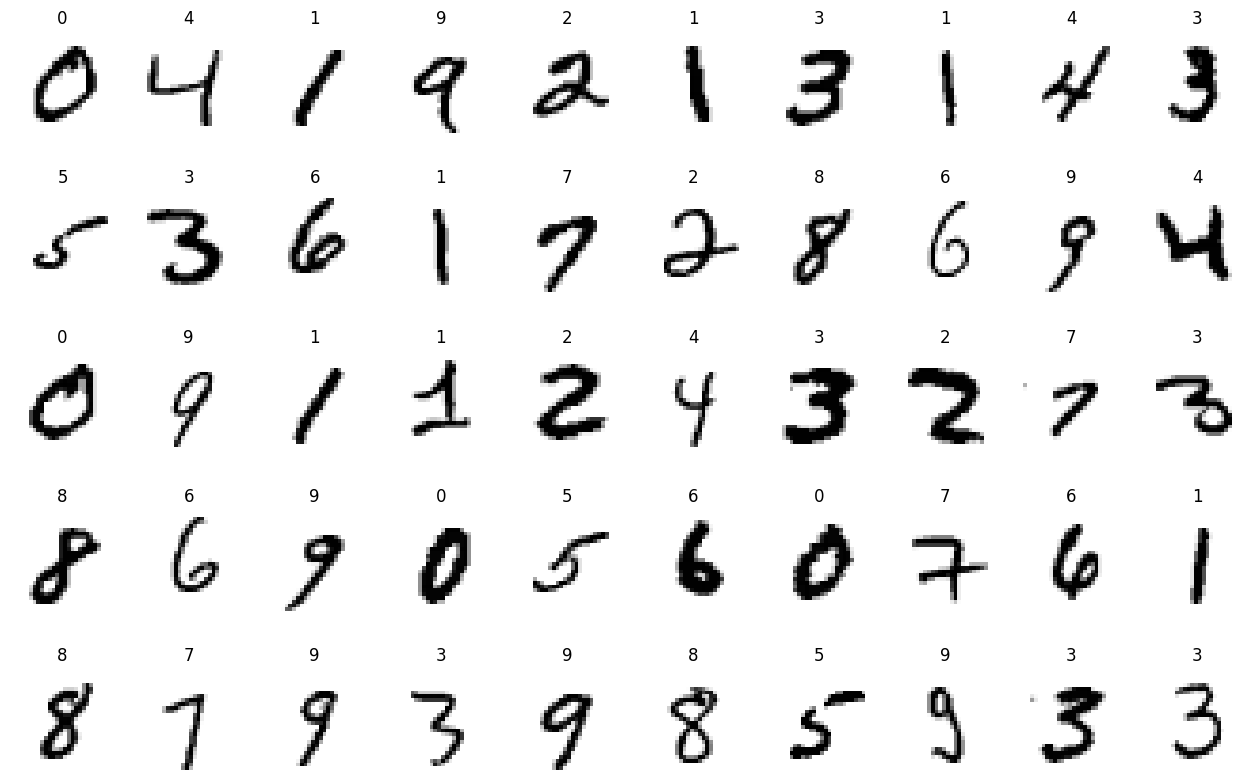

In [5]:
import matplotlib.pyplot as plt
figure = plt.figure()
plt.figure(figsize=(16,10))
num_of_images = 50 
for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

In [6]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print ("Number of Classes: " + str(y_test.shape[1]))
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [9]:
batch_size = 128
epochs = 10
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 16s 18ms/step - loss: 2.2541 - accuracy: 0.3257 - val_loss: 2.1814 - val_accuracy: 0.5315
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 1.9774 - accuracy: 0.6310 - val_loss: 1.5733 - val_accuracy: 0.7262
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 1.0276 - accuracy: 0.7887 - val_loss: 0.6233 - val_accuracy: 0.8553
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.5274 - accuracy: 0.8624 - val_loss: 0.4265 - val_accuracy: 0.8854
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.4124 - accuracy: 0.8849 - val_loss: 0.3617 - val_accuracy: 0.8991
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.3654 - accuracy: 0.8947 - val_loss: 0.3304 - val_accuracy: 0.9058
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.3382 - accuracy: 0.9022 - val_loss: 0.3110 - val_accuracy: 0.911